In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate two long-spike time series

N = 10000
spikeDur  = 10   # a.u. but must be a even number
spikeNumA = .01  # in proportion of total number of points
spikeNumB = .05  # in proportion of total number of points

# initialize to zeros
spike_tsA = np.zeros(N)
spike_tsB = np.zeros(N)

# populate time series A
spiketimesA = np.random.randint(0, N, int(N*spikeNumA))

# flesh out spikes (loop per strike)
for spikei in range(len(spiketimesA)):

    # find boundaries
    bnd_pre = int( max(0, spiketimesA[spikei] - spikeDur/2))
    bnd_pst = int( min(N, spiketimesA[spikei] + spikeDur/2))

    # fill in with ones
    spike_tsA[bnd_pre:bnd_pst] = 1

# repeat for time series B
spiketimesB = np.random.randint(0, N, int(N*spikeNumB))

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesB)):

    # find boundaries
    bnd_pre = int( max(0, spiketimesB[spikei]-spikeDur/2))
    bnd_pst = int( min(N, spiketimesB[spikei]+spikeDur/2))

    # fill in with ones
    spike_tsB[bnd_pre:bnd_pst] = 1

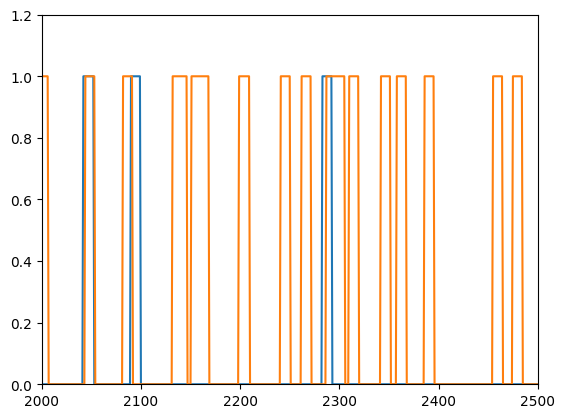

In [3]:
# let's see what they look like

plt.plot(range(N), spike_tsA, range(N), spike_tsB)
plt.ylim([0, 1.2])
plt.xlim([2000, 2500])
plt.show()

In [4]:
# compute their probabilities and intersection

# probabilities
probA = sum(spike_tsA==1) / N
probB = np.mean(spike_tsB)

# joint probability
probAB = np.mean(spike_tsA + spike_tsB == 2)

print(probA, probB, probAB)

0.0945 0.3946 0.0337


In [5]:
# compute the conditional probabilities

# p(A|B)
pAgivenB = probAB / probB

# p(B|A)
pBgivenA = probAB / probA

# print a little report
print('P(A)   = %g'%probA)
print('P(A|B) = %g'%pAgivenB)
print('P(B)   = %g'%probB)
print('P(B|A) = %g'%pBgivenA)

P(A)   = 0.0945
P(A|B) = 0.0854029
P(B)   = 0.3946
P(B|A) = 0.356614
